# 1) Conhendo os Dados

Nesta nota iniciaremos a nossa jornada com a Analise Exploratória de Dados. Iremos entender como funciona uma das principais\
bibliotecas para fazer analise de dados, o **Pandas**.

---
---
---

Para trabahar com dados, devemos importar o Pandas

In [1]:
import pandas as pd

Vamos utilizar um banco de dados fornecido pelo **Kaggle**.

Os dados são obtidos do site [kaggle](https://www.kaggle.com/datasets/surajjha101/cuisine-rating?resource=download), onde se pode obter mais informações sobre a estrutura dos dados.

In [2]:
cuisine_rating = pd.read_csv('cuisine_rating.csv')

Após feito a leitura do nosso arquivo. Uma dos principais métodos presentes no pandas é o `.head()`\
que nos permite visualizar o nosso Data Frame, informando as 5 primeiras linhas, mas também as `keys`\
que identificam cada coluna.

In [3]:
cuisine_rating.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


Podemos identificar os nomes das colunas por meio do método `.keys()`.

In [4]:
cuisine_rating.keys()

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

Um outro método importante é o `.info()` que nos passa algumas informações sobre o Data Frame.\
Nos indica a quantidade de linhas e colunas, como também se temos algum dado do tipo **NaN**, assim como o Dtype dos objetos.\
Por fim, o quanto de espaço este Data Frame ocupa.

In [5]:
cuisine_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


Note que este Data Frame é sobre o tipo de culinária presente em Nova York. Sabendo do que se trata o database.\
Podemos nos questionar: Qual tipo de culinária é mais popular?

Inicialmente precisamos acessar a coluna que indica o tipo de cozinha, no caso `Cuisines`, para isto, passamos como argumento.\
E em seguida, usando o método `.values_counts()` do pandas, temos o número de estabelecimentos por tipo de cozinha.

In [6]:
cuisine_rating['Cuisines'].value_counts()

Cuisines
Japanese    36
French      34
Filipino    34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64

Podemos identificar que a cozinha Japonesa é que apresenta mais estabelecimentos. Mas esta informação é suficiente\
para dizermos que a comida Japonesa é a mais popular? 

Ao olharmos nosso database, um outro tipo de informação presente é a avaliação do local.\
Podemos identificar qual tipo de cozinha é mais bem avaliada. 

In [7]:
tipos_de_cozinha = cuisine_rating['Cuisines'].unique()
media_tipos_de_cozinha = []
for elemento in tipos_de_cozinha:
    media = cuisine_rating[cuisine_rating['Cuisines'] == elemento]['Overall Rating'].mean()
    value = [elemento,float(round(media,2))]
    media_tipos_de_cozinha.append(value)

media_tipos_de_cozinha =sorted(media_tipos_de_cozinha, key=lambda x: x[1], reverse=True)
media_tipos_de_cozinha

[['Japanese', 3.6],
 ['Chinese', 3.27],
 ['Italian', 3.19],
 ['Indian', 3.17],
 ['Seafood', 3.14],
 ['French', 3.1],
 ['Filipino', 3.04]]

In [1]:
print('O Rank das melhores cozinhas:')
for i, item in enumerate(media_tipos_de_cozinha, start=1):
    print(f"{i:>3}. {item[0]:<10} {item[1]:>6.2f}")

O Rank das melhores cozinhas:


NameError: name 'media_tipos_de_cozinha' is not defined

Podemos dizer agora que a comida Japonesa além de ter mais estabelecimentos possuem a maior média geral.\
Este tipo de analise nos fornece mais seguridade ao afirmar que a comida japonesa é a mais popular.\
É claro que ainda poderíamos levar em considerações diversos outros fatores.

---
---
---

# 2) Fazendo Agraupamentos

Alguns momentos temos interesse de sumarizar algumas informações para facilitar a analise ou construir novas informações.

O problema caso é identificar qual melhor culinária no Central Park, o que vai indicar o melhor cenário para abrir um novo negocio.

---
---
---

O método `describe()` nos fornece inicialmente algumas informações estatísticas sobre os dados.

In [9]:
cuisine_rating.describe() # Realiza uma descrição simplificada dos dados

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


Inicialmente vamos contabilizar a quantidade de estabelecimento por regiões.

In [10]:
cuisine_rating['Location'].value_counts()

Location
St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64

Vamos selecionar apenas as colunas que possuem dados numéricos por meio do método `.select_dtypes(include = np.number)`\
E transformar em lista.

In [11]:
import numpy as np # Aqui vamos precisar da biblioteca Numpy

In [12]:
numeric_cols = cuisine_rating.select_dtypes(include=np.number).columns.to_list()
numeric_cols

['User ID',
 'Area code',
 'YOB',
 'Budget',
 'Food Rating',
 'Service Rating',
 'Overall Rating']

Este tipo de seleção nos fornece uma lista com as keys que apenas possuem dados numéricos,\
Esta lista vai ser importante, pois iremos poder agrupar a localização com cozinha e realizar uma media
apenas nas colunas que possuem dados numéricos, por meio da nossa `numeric_cols`

In [13]:
cuisine_rating.groupby(['Location', 'Cuisines'])[numeric_cols].mean()

User ID   Area code          YOB    Budget  \
Location           Cuisines                                                  
Cedar Hill, NY     Indian    141.000000  169.500000  1960.000000  4.000000   
Central Park,NY    Chinese    60.000000  129.000000  1995.000000  4.000000   
                   Filipino   83.666667  144.166667  1990.666667  3.333333   
                   French    116.000000  144.750000  2003.500000  4.000000   
                   Indian     77.000000  131.500000  2001.000000  3.000000   
                   Italian   115.000000  152.500000  1996.000000  4.000000   
                   Japanese   98.000000  138.500000  2002.000000  2.500000   
                   Seafood    80.500000  149.500000  1980.000000  3.000000   
Central Park,ny    Filipino  108.000000  162.500000  1962.000000  3.000000   
                   French     97.000000  117.500000  1976.000000  3.000000   
                   Indian     79.500000  137.000000  1986.000000  4.000000   
China Town, NY     Chinese    96.000000  106.500000  1976.000000  3.000000   
                   Filipino  130.000000  125.000000  1998.000000  1.000000   
                   French    130.500000  149.000000  1965.000000  3.500000   
                   Indian     93.333333  129.333333  1983.666667  4.333333   
                   Seafood   100.250000  135.000000  1991.750000  3.500000   
Market City, MY    Indian     82.000000  156.500000  1971.000000  1.000000   
Market City, NY    Filipino   92.000000  158.000000  1967.000000  5.000000   
                   French    105.000000  156.250000  1975.500000  4.000000   
                   Indian    122.000000  169.000000  1977.500000  3.000000   
                   Japanese  114.000000  152.333333  1981.333333  4.666667   
                   Seafood    77.000000  144.750000  1981.000000  3.000000   
Riverdale,NY       Chinese    77.000000  121.000000  1985.000000  4.500000   
                   Filipino  104.666667  116.666667  1966.333333  4.333333   
                   French    116.000000  150.500000  1975.000000  4.000000   
                   Italian    81.000000  124.333333  1981.000000  3.666667   
                   Japanese  105.750000  135.250000  1994.500000  4.500000   
                   Seafood    67.000000  133.000000  2007.000000  5.000000   
St. George,NY      Chinese    62.500000  124.000000  1984.500000  4.500000   
                   Filipino  121.166667  136.083333  1991.000000  4.000000   
                   French    109.500000  127.875000  1986.750000  4.500000   
                   Indian     96.500000  145.625000  1987.500000  3.375000   
                   Italian   101.000000  155.250000  1975.000000  2.500000   
                   Japanese  107.800000  140.800000  1985.200000  4.400000   
Upper East Side,NY Chinese   120.000000  159.400000  1980.000000  4.000000   
                   Filipino   58.000000  159.500000  2003.000000  3.000000   
                   French    101.666667  145.833333  1982.666667  3.666667   
                   Indian    124.000000  172.500000  1994.000000  3.000000   
                   Italian    93.000000  157.750000  1986.000000  5.000000   
                   Japanese   57.666667  148.666667  1988.666667  3.666667   
Upper West Side,NY Chinese   147.000000  146.000000  2000.000000  4.000000   
                   Filipino  106.000000  145.500000  1991.000000  4.000000   
                   French    136.000000  140.000000  1999.500000  4.000000   
                   Indian     83.000000  141.500000  1995.000000  3.000000   
                   Italian   110.000000  128.500000  1959.000000  5.000000   
                   Japanese  112.000000  123.500000  1955.000000  4.000000   
                   Seafood    75.500000  123.500000  1982.000000  4.000000   

                             Food Rating  Service Rating  Overall Rating  
Location           Cuisines                                               
Cedar Hill, NY     Indian       2.000000        5.000000   

Ao fazer agrupamentos, conseguimos identificar qual a média das culinárias no Central Park.

É importante notar que temos duas localizações para o Central Parking. O erro vem do fato que\
para uma das localização temos, NY e para a outra ny. Criando uma distinção entre eles. Mas sabemos que é o mesmo local.\
Vamos ver no futuro como corrigir este tipo de erro.

---
---
---

# 3) Lidando com dados faltantes

Ao realizarmos a analise de dados, muitas vezes nos deparamos com dados faltantes, erros de digitação,
dados repetidos ou outro tipo de inconsistência. Portanto, é importante saber como lidar nessas situações.

---
---
---

Os dados que vamos trabalhar aqui são sobre rede de imóveis de São Paulo, contendo informações como área,\
números de quartos, vagas, valor do aluguel, se é apartamento ou casa. 

In [14]:
house_SP = pd.read_csv('houses_sp.csv')
house_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
3,São Paulo,650.0,3.0,3,7.0,-,0,8000,834,121,8955.0,396,66,132,9,house
4,São Paulo,213.0,NaN,4,4.0,4,2254,3223,1735,41,7253.0,756,99,252,14,flat


Podemos identificar a quantidade de imóveis presente na região de São Paulo.

In [15]:
house_SP['city'].value_counts() 

city
São Paulo    7143
Name: count, dtype: int64

## Dado Constante

Esta informação é irrelevante  uma vez que ela está presente em todo o dataset e também\
por se tratar de um banco de dados da cidade de SP, desta forma é interessante remover este tipo de dado.\
Resultando em um banco de dados mais claro.

Para fazermos isso, vamos usar o método `.drop()` e pensando qual coluna queremos remover.\
E claro, salvando na variável `house_SP`.

In [16]:
house_SP = house_SP.drop(columns=['city'])
house_SP

,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
3,650.0,3.0,3,7.0,-,0,8000,834,121,8955.0,396,66,132,9,house
4,213.0,NaN,4,4.0,4,2254,3223,1735,41,7253.0,756,99,252,14,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,24.0,2.0,2,1.0,13,993,5500,141,70,6704.0,1800,93,600,13,flat
7139,280.0,4.0,4,2.0,5,4200,4000,1042,51,9293.0,1116,56,372,8,flat
7140,83.0,3.0,2,2.0,11,888,7521,221,96,8726.0,1116,84,372,12,flat
7141,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat


## Dados Null 

Muitas vezes temos dados que foram inseridos incorretos ou são faltantes.
Inicialmente precisamos identificar onde estes dados estão presentes no nosso banco de dados.

Ao olharmos para a coluna `rooms`, por meio do método `.isna()` que retorna um boleano,\
True se tivermos **NaN** e Falso se não tivermos. E em seguida usando o `.values_counts()`,\
podemos contabilizar a quantidade.

In [17]:
house_SP['rooms'].isna().value_counts()

rooms
False    7092
True       51
Name: count, dtype: int64

O nosso banco de dados possuem ao todo 7143 entradas e para o caso de `rooms` temos 51 dados **NaN**.

O que buscamos agora é como lidar com esses **NaN**.

1. A primeira alternativa é remover as linhas que contem os Nulls, contudo, esta solução remove os dados. 
2. A segunda opção é escolher uma caracterização estatística e usá-la para substituir os **NaN**.

Vamos optar pela segunda opção. Para tal, vamos olhar dois tipos de informações estatística: Média e Mediana.

In [18]:
float(house_SP['rooms'].mean())

2.5356739988719683

In [19]:
float(house_SP['rooms'].median())

3.0

Note-se que a média é 2.53, e a mediana é 3. Neste caso, não temos 2 quartos e meio. O que nos leva a usar o valor da mediana\
que para este tipo de problema, é uma solução aceitável.

Agora, para realizarmos a substituição, precisamos identificar quais os valores são **NaN** e substituir pela média.\
Para isto, usaremos o método `.fillna()` que identifica os **NaN** e substitui pelo argumento passado,\
que neste caso é a mediana.

E salvamos na mesma coluna dos `rooms`.

In [20]:
house_SP['rooms'] = house_SP['rooms'].fillna(house_SP['rooms'].median())

Avaliando novamente o nosso banco de dados.

In [21]:
house_SP

,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
3,650.0,3.0,3,7.0,-,0,8000,834,121,8955.0,396,66,132,9,house
4,213.0,3.0,4,4.0,4,2254,3223,1735,41,7253.0,756,99,252,14,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7138,24.0,2.0,2,1.0,13,993,5500,141,70,6704.0,1800,93,600,13,flat
7139,280.0,4.0,4,2.0,5,4200,4000,1042,51,9293.0,1116,56,372,8,flat
7140,83.0,3.0,2,2.0,11,888,7521,221,96,8726.0,1116,84,372,12,flat
7141,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat


## Dados digitados errados

Também temos situações que ao em vez de digitar um valor numérico, digitamos algum outro tipo de caractere. 

O caso a seguir, identificamos que na coluna `floor` temos o caractere **-**, por andar se um valor numérico,
sabemos que este caractere é um erro.


In [22]:
house_SP.head(10)

,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
3,650.0,3.0,3,7.0,-,0,8000,834,121,8955.0,396,66,132,9,house
4,213.0,3.0,4,4.0,4,2254,3223,1735,41,7253.0,756,99,252,14,flat
5,152.0,2.0,2,1.0,3,1000,15000,250,191,16441.0,2412,142,804,20,flat
6,26.0,1.0,1,NaN,2,470,2100,150,27,2747.0,828,85,276,12,flat
7,36.0,1.0,1,NaN,11,359,2100,70,27,2556.0,360,22,120,3,flat
8,55.0,1.0,1,1.0,2,790,4200,224,54,5268.0,540,120,180,17,flat
9,100.0,2.0,2,2.0,24,900,4370,17,56,5343.0,1044,65,348,9,flat


Podemos substituir o traço por um número condizendo com os dados. Contudo, precisamos inicialmente saber\
a incidência deste valor.

In [23]:
house_SP['floor'].value_counts() # A incidência é muito alta, não podemos apenas remover

floor
-      1847
1       727
2       506
4       402
3       399
5       370
7       312
6       297
8       291
10      256
11      241
9       230
14      206
13      206
12      190
15      120
16       84
17       71
21       58
20       56
18       56
26       54
19       45
25       36
22       22
23       21
24       18
27        7
28        6
29        4
32        2
35        1
110       1
46        1
Name: count, dtype: int64

Aqui vale realizarmos uma pesquisa com o grupo que fez a coleta de dados. Pois temos uma grande incidência do caractere.\
O que nos leva a crer que os usuários buscaram preencher a informação com algum valor que não estava presente.\
Uma opção é imaginarmos que os imóveis que estão no térreo não está sendo representado. 
Assumindo então que o **-** indica os imóveis no térreo, vamos realizar a substituição por um valor mais condizente com os dados,\
neste caso, pelo valor nulo, o zero. Contudo, está modificação precisa ser validada com a área de negócios.

Para isto, usando o método `.loc()` para localizar o **_** na coluna `floor` e passando o valor a ser substituído. 

In [24]:
house_SP.loc[house_SP['floor'] == '-', 'floor'] = '0'

In [25]:
house_SP.head(10)

,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
3,650.0,3.0,3,7.0,0,0,8000,834,121,8955.0,396,66,132,9,house
4,213.0,3.0,4,4.0,4,2254,3223,1735,41,7253.0,756,99,252,14,flat
5,152.0,2.0,2,1.0,3,1000,15000,250,191,16441.0,2412,142,804,20,flat
6,26.0,1.0,1,NaN,2,470,2100,150,27,2747.0,828,85,276,12,flat
7,36.0,1.0,1,NaN,11,359,2100,70,27,2556.0,360,22,120,3,flat
8,55.0,1.0,1,1.0,2,790,4200,224,54,5268.0,540,120,180,17,flat
9,100.0,2.0,2,2.0,24,900,4370,17,56,5343.0,1044,65,348,9,flat


Outro dado que pode gerar problemas está relacionado ao *parking spaces*, alguns estão contendo valores como *NaN*.\
Provavelmente indicando que as residencias não possuem estacionamentos.\
Vamos categorizar por tamanho. Obter a média de estacionamento para uma casa até uma certa área. Com isso indicamos que quanto maior a residência, mais estacionamento ela pode ter. 

### Casa

In [26]:
house_SP[(house_SP['type'] == 'house') & (house_SP['area'] <= 50)]['parking spaces'].mean()

np.float64(1.0869565217391304)

In [27]:
median_house_50  = house_SP[(house_SP['type'] == 'house') & (house_SP['area'] <= 50)]['parking spaces'].median()

Para casa até $50\,m^2$ tanto a mediana quanto a média é 1. Portanto vamos estabelecer o valor 1 para estas residências

In [28]:
house_SP.loc[(house_SP['type'] == 'house') & (house_SP['area'] <= 50) & (house_SP['parking spaces'].isna()), 'parking spaces'] = median_house_50

In [29]:
house_SP[(house_SP['type'] == 'house') & (house_SP['area'] <= 50) & (house_SP['parking spaces'])]['parking spaces'].isna().value_counts()

parking spaces
False    254
Name: count, dtype: int64

Podemos ver que agora temos apenas casas com valores. 

Vamos fazer o mesmo para casas entre $50\,m^2$ e $100\,m^2$

In [30]:
house_SP[(house_SP['type'] == 'house') & (house_SP['area'] >= 50) & (house_SP['area'] <= 100)]['parking spaces'].mean()

np.float64(1.5594713656387664)

In [31]:
median_house_50_100 = house_SP[(house_SP['type'] == 'house') & (house_SP['area'] >= 50) & (house_SP['area'] <= 100)]['parking spaces'].median()

In [32]:
house_SP.loc[(house_SP['type'] == 'house') & (house_SP['area'] >= 50) & (house_SP['area'] <= 100) & (house_SP['parking spaces'].isna()), 'parking spaces'] = median_house_50_100

In [33]:
house_SP[(house_SP['type'] == 'house') & (house_SP['area'] >= 50) & (house_SP['area'] <= 100)]['parking spaces'].isna().value_counts()

parking spaces
False    361
Name: count, dtype: int64

O mesmo para casas com mais de $100\,m^2$

In [34]:
house_SP[(house_SP['type'] == 'house') & (house_SP['area'] >= 100)]['parking spaces'].mean()

np.float64(3.4983870967741937)

In [35]:
median_house_greater_100 = house_SP[(house_SP['type'] == 'house') & (house_SP['area'] >= 100)]['parking spaces'].median()

In [36]:
house_SP.loc[(house_SP['type'] == 'house') & (house_SP['area'] >= 100) & (house_SP['parking spaces'].isna()), 'parking spaces'] = median_house_greater_100

In [37]:
house_SP[(house_SP['type'] == 'house') & (house_SP['area'] >= 100)]['parking spaces'].isna().value_counts()

parking spaces
False    1369
Name: count, dtype: int64

Agora todas as casas tiveram seus **parking spaces** preenchidos? 

In [38]:
house_SP['parking spaces'][(house_SP['type'] == 'house')].isna().value_counts()

parking spaces
False    1843
True        4
Name: count, dtype: int64

Ainda temos 4 linhas que possuem *parking spaces* como *NaN*

Olhando bem para estas 4 linhas, podemos ver que são 4 locais que não possuem área, por isso código anterior não pegou. Como é apenas 4 linhas, podemos remover.

In [39]:
house_SP[(house_SP['type'] == 'house') & (house_SP['parking spaces'])] = house_SP[(house_SP['type'] == 'house') & (house_SP['area'])].dropna()

In [40]:
house_SP['parking spaces'][(house_SP['type'] == 'house')].isna().value_counts()

parking spaces
False    1837
True        4
Name: count, dtype: int64

In [41]:
house_SP = house_SP.drop(house_SP[(house_SP['type'] == 'house') & (house_SP['parking spaces'].isna())].index)

Vamos fazer a mesma análise, mas agora para os apartamentos

### Apartamento

In [42]:
house_SP[house_SP['type']=='flat'].isnull().value_counts()

area   rooms  bathroom  parking spaces  floor  hoa    rent   tax    insurance  total  page hits  days available  interactions  weeks available  type 
False  False  False     False           False  False  False  False  False      False  False      False           False         False            False    4215
                        True            False  False  False  False  False      False  False      False           False         False            False    1056
True   False  False     False           False  False  False  False  False      False  False      False           False         False            False      22
                        True            False  False  False  False  False      False  False      False           False         False            False       3
Name: count, dtype: int64

Como este código conseguimos identificar que temos *NuN* no *parking spaces* e na *area*.

Como temos apenas *NuN* dentro da *area* vamos iniciar por ele e saber se são muitos dados. 

In [43]:
house_SP[house_SP['area'].isna()]
# Este resultado no indicou que algumas linhas possuem apenas NaN, vamos remove-lás

,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233,NaN,1.0,1.0,1.0,2,1900.0,4200.0,350,54.0,6504.0,1836.0,122.0,612.0,17.0,flat
1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,2.0,2.0,1.0,8,980.0,2240.0,215,29.0,3464.0,1152.0,64.0,384.0,9.0,flat
1471,NaN,1.0,1.0,1.0,7,522.0,3100.0,120,40.0,3782.0,288.0,29.0,96.0,4.0,flat
1484,NaN,3.0,2.0,2.0,8,1750.0,2975.0,359,38.0,5122.0,576.0,87.0,192.0,12.0,flat
1525,NaN,1.0,1.0,1.0,14,557.0,3000.0,95,39.0,3691.0,2088.0,113.0,696.0,16.0,flat
1593,NaN,4.0,3.0,3.0,2,3260.0,7500.0,550,96.0,11406.0,1512.0,91.0,504.0,13.0,flat
1777,NaN,3.0,2.0,1.0,17,1250.0,2000.0,230,26.0,3506.0,2088.0,106.0,696.0,15.0,flat
1803,NaN,2.0,1.0,1.0,6,660.0,2700.0,98,35.0,3493.0,1404.0,80.0,468.0,11.0,flat


In [44]:
house_SP = house_SP.drop(house_SP[(house_SP['area'].isna()) & (house_SP['hoa'].isna())].index)

In [45]:
house_SP.isna().value_counts()
# Este resultado no indicou que algumas linhas possuem apenas NaN, vamos remove-lás

area   rooms  bathroom  parking spaces  floor  hoa    rent   tax    insurance  total  page hits  days available  interactions  weeks available  type 
False  False  False     False           False  False  False  False  False      False  False      False           False         False            False    6052
                        True            False  False  False  False  False      False  False      False           False         False            False    1056
True   False  False     False           False  False  False  False  False      False  False      False           False         False            False      22
                        True            False  False  False  False  False      False  False      False           False         False            False       3
Name: count, dtype: int64

In [46]:
house_SP[house_SP['area'].isna()]
# Temos 22 linhas que não possuem o valor da área. Podemos olhar para outro dado que possa indicar o valor médio da área.
# Um bom indicador é o valor do aluguel, estamos considerando quanto maior o aluguel, maior a area do imóvel. 

,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
1233,NaN,1.0,1.0,1.0,2,1900.0,4200.0,350,54.0,6504.0,1836.0,122.0,612.0,17.0,flat
1448,NaN,2.0,2.0,1.0,8,980.0,2240.0,215,29.0,3464.0,1152.0,64.0,384.0,9.0,flat
1471,NaN,1.0,1.0,1.0,7,522.0,3100.0,120,40.0,3782.0,288.0,29.0,96.0,4.0,flat
1484,NaN,3.0,2.0,2.0,8,1750.0,2975.0,359,38.0,5122.0,576.0,87.0,192.0,12.0,flat
1525,NaN,1.0,1.0,1.0,14,557.0,3000.0,95,39.0,3691.0,2088.0,113.0,696.0,16.0,flat
1593,NaN,4.0,3.0,3.0,2,3260.0,7500.0,550,96.0,11406.0,1512.0,91.0,504.0,13.0,flat
1777,NaN,3.0,2.0,1.0,17,1250.0,2000.0,230,26.0,3506.0,2088.0,106.0,696.0,15.0,flat
1803,NaN,2.0,1.0,1.0,6,660.0,2700.0,98,35.0,3493.0,1404.0,80.0,468.0,11.0,flat
1882,NaN,4.0,4.0,4.0,6,3200.0,6000.0,100,77.0,9377.0,288.0,52.0,96.0,7.0,flat
1992,NaN,1.0,1.0,2.0,2,3398.0,1900.0,288,25.0,5611.0,1800.0,99.0,600.0,14.0,flat


In [47]:
area_1000      = house_SP[(house_SP['type'] == 'flat') & (house_SP['rent'] <= 1000)]['area'].mean()
area_1000_2000 = house_SP[(house_SP['type'] == 'flat') & (house_SP['rent'] > 1000) & (house_SP['rent'] <= 2000)]['area'].mean()
area_2000_4000 = house_SP[(house_SP['type'] == 'flat') & (house_SP['rent'] > 2000) & (house_SP['rent'] <= 4000)]['area'].mean()
area_4000_8000 = house_SP[(house_SP['type'] == 'flat') & (house_SP['rent'] > 4000) & (house_SP['rent'] <= 8000)]['area'].mean()
area_8000      = house_SP[(house_SP['type'] == 'flat') & (house_SP['rent'] > 8000)]['area'].mean()

In [48]:
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['rent'] <= 1000) & (house_SP['area'].isna()), 'area' ] = area_1000

In [49]:
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['rent'] > 1000) & (house_SP['rent'] <= 2000) & (house_SP['area'].isna()), 'area' ] = area_1000_2000
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['rent'] > 2000) & (house_SP['rent'] <= 4000) & (house_SP['area'].isna()), 'area' ] = area_2000_4000
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['rent'] > 4000) & (house_SP['rent'] <= 8000) & (house_SP['area'].isna()), 'area' ] = area_4000_8000
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['rent'] > 8000) & (house_SP['area'].isna()), 'area' ] = area_8000

In [50]:
house_SP[house_SP['area'].isna()].value_counts() # Não temos mais nenhum NaN

Series([], Name: count, dtype: int64)

Voltando para os nossos dados, temos agora *NaN* apenas no parking spaces.

In [51]:
house_SP.isna().value_counts()
# Este resultado no indicou que algumas linhas possuem apenas NaN, vamos remove-lás

area   rooms  bathroom  parking spaces  floor  hoa    rent   tax    insurance  total  page hits  days available  interactions  weeks available  type 
False  False  False     False           False  False  False  False  False      False  False      False           False         False            False    6074
                        True            False  False  False  False  False      False  False      False           False         False            False    1059
Name: count, dtype: int64

Dando continuidade, vamos inferir o parking spaces pelo tamanho da área do imóvel.

In [52]:
median_flat_parking_spaces_50      = house_SP[(house_SP['type'] == 'flat') & (house_SP['area'] <= 50)]['parking spaces'].median()
median_flat_parking_spaces_50_100  = house_SP[(house_SP['type'] == 'flat') & (house_SP['area'] >= 50) & (house_SP['area'] <= 100)]['parking spaces'].median()
median_flat_parking_spaces_100_150 = house_SP[(house_SP['type'] == 'flat') & (house_SP['area'] >= 100) & (house_SP['area'] <= 150)]['parking spaces'].median()
median_flat_parking_spaces_150     = house_SP[(house_SP['type'] == 'flat') & (house_SP['area'] >= 150)]['parking spaces'].median()

print('A mediana das vagas de carros para apartamentos são')
print(f'Até        Vagas\n')
print(f'50 m2              {median_flat_parking_spaces_50}')
print(f'50 à 100 m2        {median_flat_parking_spaces_50_100}')
print(f'100 à 150 m2       {median_flat_parking_spaces_100_150}')
print(f'Maior que 150 m2   {median_flat_parking_spaces_150}')



A mediana das vagas de carros para apartamentos são
Até        Vagas

50 m2              1.0
50 à 100 m2        1.0
100 à 150 m2       2.0
Maior que 150 m2   3.0


Usando estas informações, podemos remover os *NaN* associados as vagas.

In [53]:
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['area'] <= 50)  & (house_SP['parking spaces'].isna()), 'parking spaces' ]                            = median_flat_parking_spaces_50
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['area'] >= 50)  & (house_SP['area'] <= 100) &(house_SP['parking spaces'].isna()), 'parking spaces' ] = median_flat_parking_spaces_50_100
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['area'] >= 100) & (house_SP['area'] <= 150) &(house_SP['parking spaces'].isna()), 'parking spaces' ] = median_flat_parking_spaces_100_150
house_SP.loc[(house_SP['type'] == 'flat') & (house_SP['area'] >= 150) & (house_SP['parking spaces'].isna()), 'parking spaces' ]                            = median_flat_parking_spaces_150

In [54]:
house_SP.isna().value_counts()


area   rooms  bathroom  parking spaces  floor  hoa    rent   tax    insurance  total  page hits  days available  interactions  weeks available  type 
False  False  False     False           False  False  False  False  False      False  False      False           False         False            False    7133
Name: count, dtype: int64

In [55]:
house_SP.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7133 entries, 0 to 7142
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             7133 non-null   float64
 1   rooms            7133 non-null   float64
 2   bathroom         7133 non-null   float64
 3   parking spaces   7133 non-null   float64
 4   floor            7133 non-null   object 
 5   hoa              7133 non-null   float64
 6   rent             7133 non-null   float64
 7   tax              7133 non-null   object 
 8   insurance        7133 non-null   float64
 9   total            7133 non-null   float64
 10  page hits        7133 non-null   float64
 11  days available   7133 non-null   float64
 12  interactions     7133 non-null   float64
 13  weeks available  7133 non-null   float64
 14  type             7133 non-null   object 
dtypes: float64(12), object(3)
memory usage: 891.6+ KB


Agora todos os *NaN* do nossa database foram removidos. Voltando ao *info()* notamos que todos os dados possuem uma estrutura coerente.

---
---
---

# 4) Outliers e tratamento

Muitas vezes ao analisar os dados, encontramos padrões que são destoante. Considerados pontos fora da curva.\
Esses pontos são conhecidos como **Outliers**, resultando em destorção na analise dos dados.

---
---
---


Um exemplo comum é pensar em uma empresa no qual os funcionários recebem em média 5 mil reais e\
o presidente recebe 100 mil reais. O valor do associado ao cargo do presidente é extremamente\
superior aos outros cargos. Desta forma, ao fazermos uma média de salário da empresa, este ultimo valor\
pode mascarar os resultados.

Nessa nota vamos trabalhar com a identificação dos Outliers e como trata-los.

Para isto, vamos importar um banco de dados com informações sobre casas para alugar.

In [56]:
import pandas as pd
import numpy as np

houses_rent = pd.read_csv("houses_to_rent.csv")
houses_rent

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,São Paulo,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat
11761,Porto Alegre,63.0,2.0,1,1.0,5,402,1478,24,22,1926.0,58,86,116,12,flat
11762,São Paulo,285.0,4.0,4,4.0,17,3100,15000,973,191,19264.0,612,99,204,14,flat
11763,Brotas,100.0,1.0,2,1.0,-,0,800,116,39,955.0,148,127,148,18,house


Vamos visualizar os dados descritivos

In [57]:
houses_rent.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11687.000000,11686.000000,11765.000000,8800.000000,1.176500e+04,11765.000000,11765.000000,1.176500e+04,11765.000000,11765.000000,11765.000000,11765.000000
mean,145.652691,2.496406,2.280408,2.181705,1.162632e+03,4033.429154,56.525032,5.622370e+03,593.139992,73.644454,228.023969,10.307012
std,288.676311,1.165594,1.445071,1.519448,1.486720e+04,3564.190560,97.487374,1.579576e+04,559.727661,35.725794,174.183959,5.101312
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.600000e+02,1600.000000,22.000000,2.176000e+03,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,5.610000e+02,2790.000000,37.000000,3.762000e+03,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1.300000e+03,5100.000000,70.000000,6.990000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,1.117000e+06,45000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


Note que, para banheiros, temos uma média de 2.2 banheiros, um mínimo de 1 banheiro por residência, contudo, temos\
residências que contém 25 banheiros, um valor muito alto comparado com a média.

Vamos nos aprofundar mais, olhando a quantidade de casas por banheiro.

In [58]:
houses_rent['bathroom'].value_counts()

bathroom
1     4645
2     3105
3     1599
4     1438
5      614
6      252
7       92
8       11
9        4
10       3
20       1
25       1
Name: count, dtype: int64

Podemos notar que no geral, a maioria das casas tem até 4 banheiros e apenas poucas casas com mais de 10 banheiros.
Estes pontos destoam e podem influência a estatística da nossa analise. 

Para podemos detectar os Outliers, precisamos aplicar algumas critérios de detecção:

- **IQR**: Distância inter quartil

Para aplicar está técnica devemos calcular os quartis:
 - O **Q1** (primeiro quartil) é o valor que delimita os 25% menores dados, por meio do método `.quantile(0.25)`
 - O **Q3** (terceiro quartil) é o valor que delimita os 25% maiores dados, por meio do método `.quantile(0.75)`

 Temos o cálculo do IQR, que indica o intervalo que captura o range central de 50% dos dados;
 - $IQR = Q3 - Q1$

 E para identificar os outliers:

 - Valores abaixo de $Out_{Sup} = Q1 -1.5 * IQR$ ou acima $Out_{Inf} = Q3 +1.5 * IQR$  são considerados outliers.

In [59]:
q1 = houses_rent['bathroom'].quantile(0.25) # primeiro quartil
q3 = houses_rent['bathroom'].quantile(0.75) # primeiro quartil

IQR = q3 -q1

print(f"IQR = {IQR}, Q1 = {q1}, Q3 = {q3}")

IQR = 2.0, Q1 = 1.0, Q3 = 3.0


Identificado os critérios, podemos agora fazer a filtragem.

In [60]:
house_outliers = houses_rent[(houses_rent['bathroom'] < q1 - (IQR * 1.5)) | (houses_rent['bathroom'] > q3 + (IQR *1.5))]
house_outliers

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
17,Rio de Janeiro,88.0,2.0,20,1.0,9,1614,3500,221,16,5351.0,96,64,48,9,flat
1174,Campinas,NaN,5.0,7,8.0,-,0,14000,667,211,14878.0,148,80,148,11,house
1452,São Paulo,900.0,4.0,9,8.0,1,0,15000,5700,226,20926.0,1440,78,480,11,flat
1565,Belo Horizonte,548.0,4.0,7,6.0,17,5905,15000,2484,200,23589.0,162,87,162,12,flat
1671,Belo Horizonte,1000.0,5.0,7,8.0,-,0,14980,1904,246,17130.0,138,99,138,14,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11258,Campinas,560.0,7.0,7,8.0,-,0,9000,911,136,10047.0,52,86,52,12,house
11503,São Paulo,650.0,5.0,8,7.0,-,0,15000,2667,226,17893.0,396,85,132,12,house
11550,Belo Horizonte,330.0,5.0,7,5.0,10,1030,4800,973,64,6867.0,180,99,180,14,flat
11681,São Paulo,800.0,4.0,7,8.0,-,10000,8500,209,128,18837.0,1152,93,384,13,house


Para tratar os outliers devemos remover eles. 

Basta fazermos o filtro ao contrário

In [61]:
house_inlers = houses_rent[(houses_rent['bathroom'] >= q1 - (IQR * 1.5)) & (houses_rent['bathroom'] <= q3 + (IQR *1.5))]
house_inlers

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,São Paulo,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat
11761,Porto Alegre,63.0,2.0,1,1.0,5,402,1478,24,22,1926.0,58,86,116,12,flat
11762,São Paulo,285.0,4.0,4,4.0,17,3100,15000,973,191,19264.0,612,99,204,14,flat
11763,Brotas,100.0,1.0,2,1.0,-,0,800,116,39,955.0,148,127,148,18,house


In [62]:
house_inlers.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11577.000000,11575.000000,11653.000000,8691.000000,1.165300e+04,11653.000000,11653.000000,1.165300e+04,11653.000000,11653.000000,11653.000000,11653.000000
mean,141.648095,2.472916,2.229984,2.138074,1.161767e+03,3975.474213,55.632369,5.550646e+03,592.354587,73.601905,227.836094,10.300953
std,286.410543,1.139837,1.340490,1.461525,1.493595e+04,3496.314911,97.227680,1.584018e+04,559.277132,35.647503,174.068174,5.090071
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.800000e+02,1600.000000,22.000000,2.160000e+03,144.000000,51.000000,100.000000,7.000000
50%,90.000000,2.000000,2.000000,2.000000,5.700000e+02,2720.000000,36.000000,3.726000e+03,432.000000,72.000000,180.000000,10.000000
75%,183.000000,3.000000,3.000000,3.000000,1.300000e+03,5000.000000,69.000000,6.837000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,6.000000,12.000000,1.117000e+06,30000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


Note que inicialmente a média era de 2.28 e agora a média é de 2.22, uma diferença de 0.05. 
Esta correção, torna a analise mais fiel, uma vez que se tem poucos imóveis com um grande volume de banheiros.

---
---
---

# 5) Visualizações para variáveis categóricas

Dentro do mundo da analise de dados, muitas vezes algumas variáveis podem está (co)relacionadas com outros dados.\
Tornando-se úteis na predição variáveis categóricas. Para podermos identifica-las, é recorrente o uso gráfico destes dados.

Nesta nota, vamos aprender a visualizar os dados de forma gráfica.

---
---
---


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Vamos analise um dataset de um conjunto de flores conhecida como **Iris**.

Esta flor possuem três subespécies: setosa, versicolor, virgínica.\
E também temos as características da flor: sepal_length, sepal_width, petal_length, petal_width.

In [64]:
iris = sns.load_dataset('iris')

In [65]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


O que buscamos nesta analise é saber se conseguimos identificar a categoria da especie por meio das suas características.

Podemos analisar inicialmente a distribuição das variáveis.

Text(0.5, 1.0, 'Distribuição da variável sepal_length')

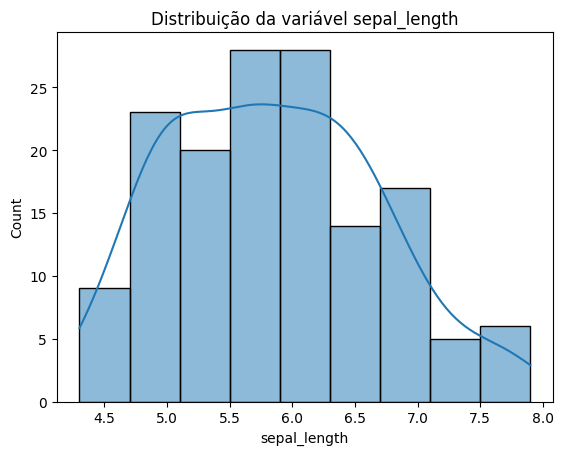

In [66]:
col = 'sepal_length'

sns.histplot(data=iris, x=col, kde=True).set_title(f"Distribuição da variável {col}")
# kde=True mostra a curva de distribuição

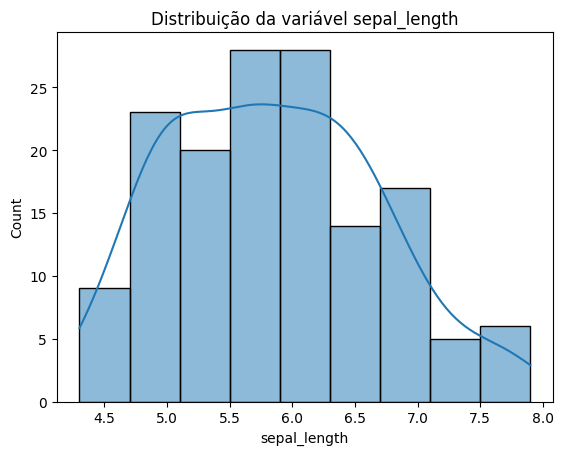

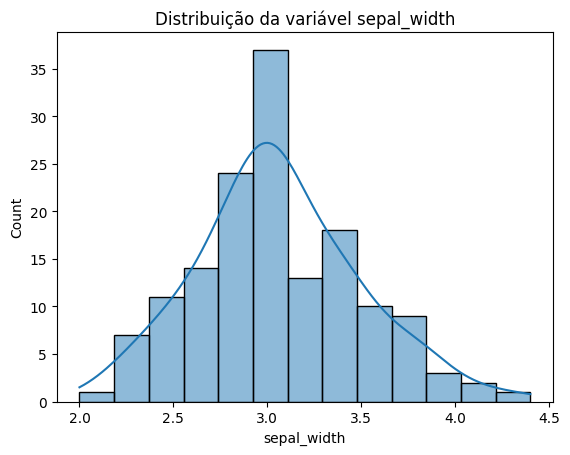

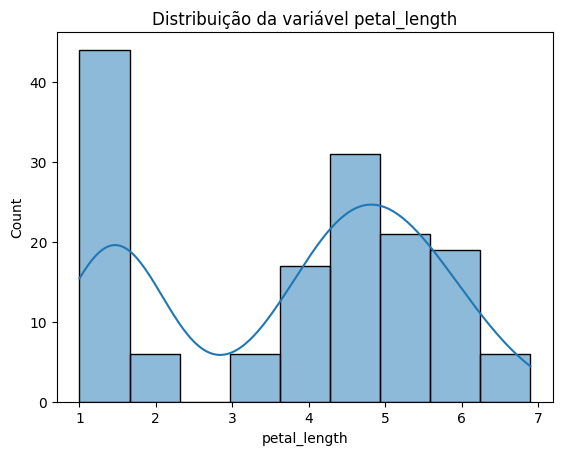

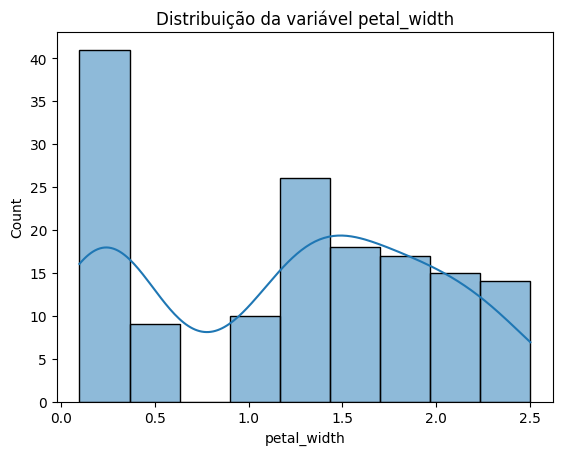

In [67]:
for col in iris.drop(columns='species'):
    sns.histplot(data=iris, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()


Desta forma conseguimos analisar a distribuição das variáveis. 

Um outro recurso interessante, é passar o argumento `hue` que vai nos fornece a distribuição das variáveis,mas para todas\
as especies com cores diferentes.

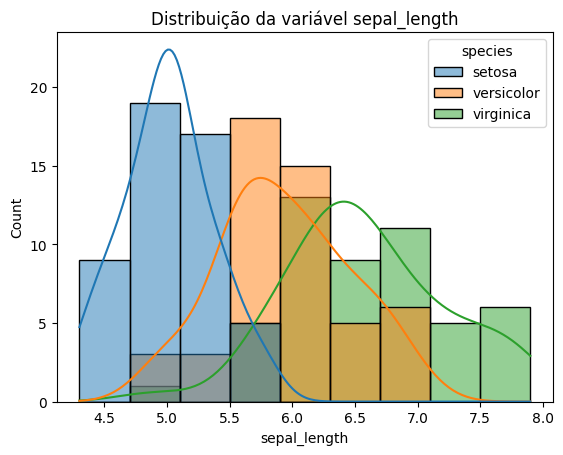

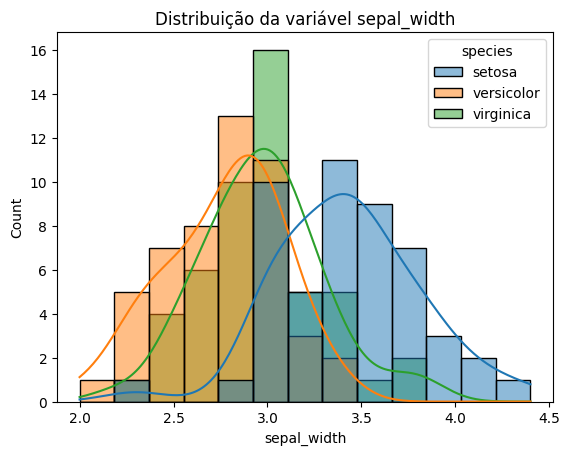

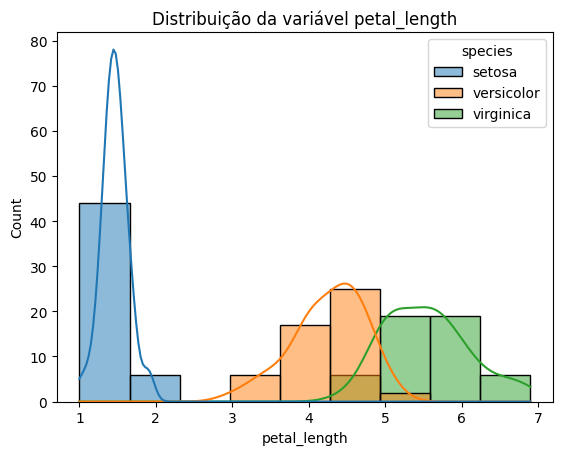

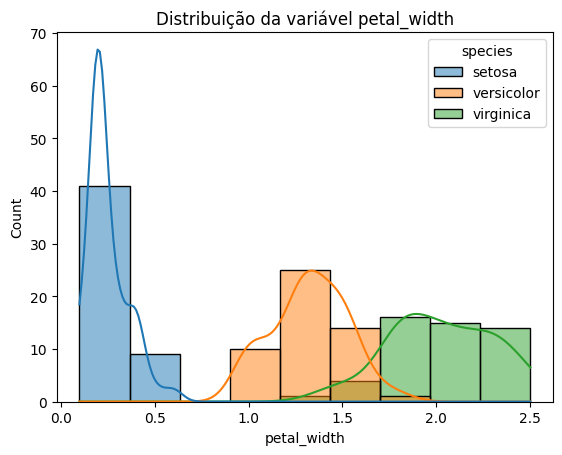

In [68]:
for col in iris.drop(columns='species'):
    sns.histplot(data=iris, x=col, kde=True, hue=iris['species']).set_title(f"Distribuição da variável {col}")
    plt.show()


Podemos notar que dois gráficos possuem demarcadores bem distintos. Tanto para o caso do petal_length como o petal_width,\
os valores exibidos são bem demarcados, indicando que estás variáveis são importantes para a identificação da especie.

Outra opção de visualização é por meio do método `braplot()` que constroem gráficos de barra exibindo a média e o argumento `errorbar=('ci', 90)`\
nos informar uma barra de confiança, indicando que com 90% de chance ao selecionarmos um dos valores, ele estará dentro desta barra.

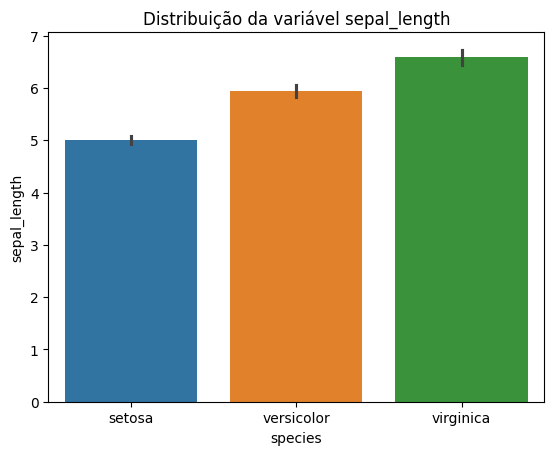

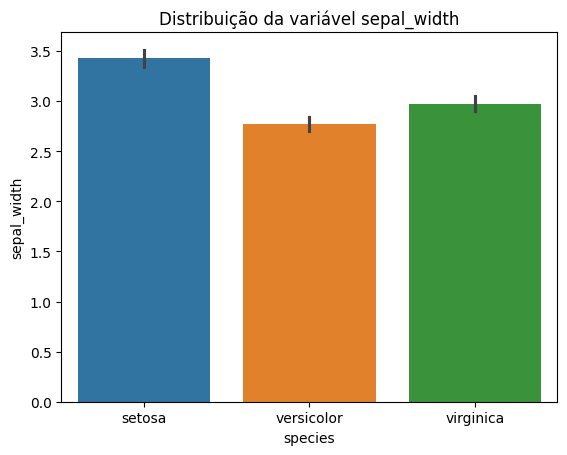

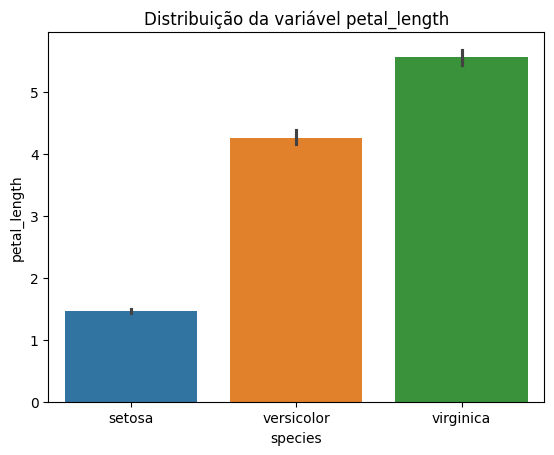

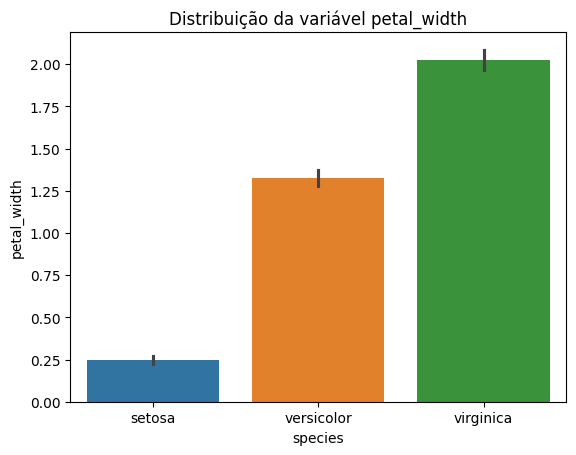

In [69]:
for col in iris.drop(columns='species'):
    sns.barplot(data=iris, x=iris['species'], hue=iris['species'], y = col, errorbar=('ci', 90)).set_title(f"Distribuição da variável {col}")
    plt.show()

Note novamente que a distribuição das variáveis petal_length e petal_width são muito bem demarcadas,\
sendo boas variáveis categóricas sendo úteis na construção de insight

---
---
---

# 6) Visualizações para séries históricas

Nesta nota vamos tratar de dados que possuem evolução temporal e como podemos visualizá-los

---
---
---


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

O banco de dados que iremos usar está relacionado a venda de doces.

In [71]:
candy = pd.read_csv('candy_production.csv')
candy

,observation_date,industrial_production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


As informações que temos é a data da produção e a quantidade produzida em toneladas.

O banco de dados tem como data inicial em 1972 e vai até 2017. 

Se olharmos para as 12 primeiras e ultimas linhas.

In [72]:
candy.head(12)

,observation_date,industrial_production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
5,1972-06-01,67.6467
6,1972-07-01,69.0429
7,1972-08-01,70.8370
8,1972-09-01,75.0462
9,1972-10-01,106.9289


In [73]:
candy.tail(12)

,observation_date,industrial_production
536,2016-09-01,109.3191
537,2016-10-01,119.0502
538,2016-11-01,116.8431
539,2016-12-01,116.4535
540,2017-01-01,109.4666
541,2017-02-01,113.4661
542,2017-03-01,105.2245
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022


Um efeito que ocorre na venda de doces é o aumento das vendas quando está próximo do mes de outubro.\
Iremos nesta nota, realizar uma analise a respeito destas vendas temporais.

O efeito de produção de doces pode ter aumenta devido um efeito sazonal, vale ressaltar que esta tabela de vendas,\
é para os Estados Unidos da America, o que nos indica que próximo desta data temos os feriados de férias.

Inicialmente está é um hipótese que fazemos e queremos verificar graficamente.

Para realizar esta analise, vamos inicialmente checar as informações do nosso banco de dados.

In [74]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   observation_date       548 non-null    object 
 1   industrial_production  548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


Note que a data de observação não está sendo interpretada como data.\
Queremos converter estas informações para um formato de data por meio do método `to_datetime()`.

In [75]:
candy['observation_date'] = pd.to_datetime(candy['observation_date']) 

In [76]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_date       548 non-null    datetime64[ns]
 1   industrial_production  548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


Agora podemos visualizar os dados por meio de um plot.

<Axes: xlabel='observation_date'>

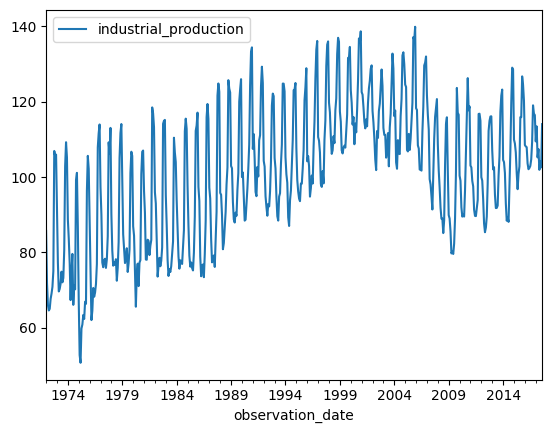

In [77]:
candy.plot(x='observation_date', y='industrial_production')

Inicialmente notamos que o gráfico não é tão claro, uma vez que ele está fazendo leitura mensal e por possuir uma grande escala,\
não conseguimos visualizar os efeito mensais.

Vamos limitar nossa tabela iniciando no ano de 2010. Note que limitar nossa tabela nem sempre é uma boa atitude,\
pois pode remover informações importante. Mas aqui neste caso, queremos apenas fazer uma simples analise.

In [78]:
candy_filtered = candy[candy['observation_date'] >= '2010-01-01']
candy_filtered

,observation_date,industrial_production
456,2010-01-01,100.3797
457,2010-02-01,99.0155
458,2010-03-01,91.9654
459,2010-04-01,89.4914
460,2010-05-01,89.9713
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


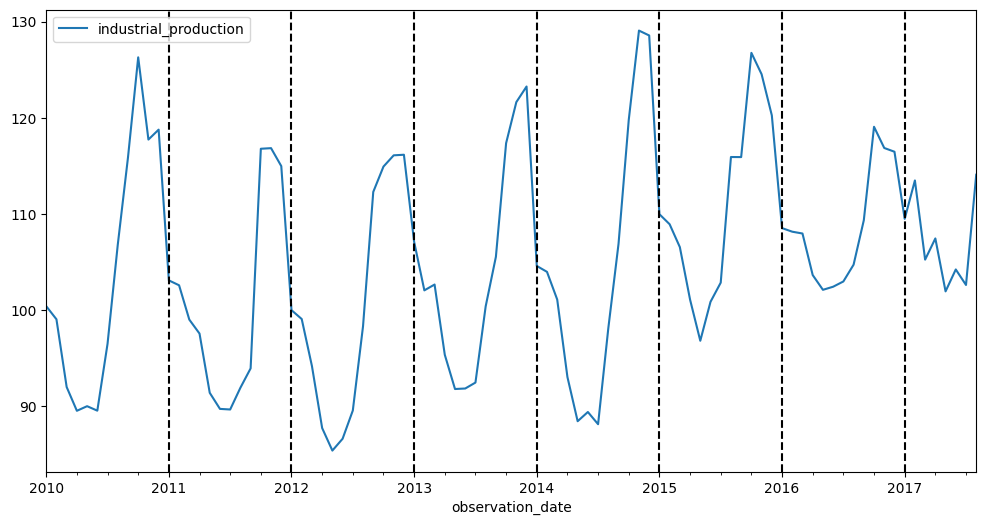

In [79]:
xcoord = ['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
ax = candy_filtered.plot( x='observation_date', y='industrial_production', figsize=(12, 6))

for xc in xcoord:
    plt.axvline(x =xc, color = 'black', linestyle = '--')



Este gráfico nos informa que temos uma sazonalidade na produção industrial, tendo seu pico proximo ao final do ano,\
e em seguida diminuindo até um mínimo por volta do meio do ano e retornando a aumentar.

Para ser mais complete, podemos usar uma biblioteca chamada `statsmodels` para realizar uma decomposição,\
sazonal.

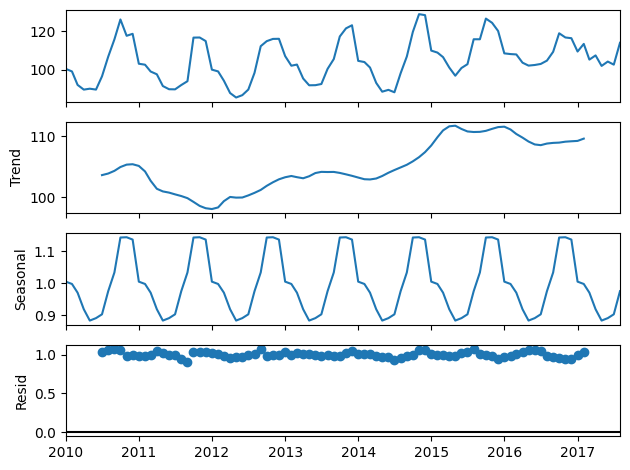

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Esta biblioteca necessita que o observation_date seja passado como index
# Aqui realizamos esta conversão

candy_filtered.set_index('observation_date', inplace=True)

analysis = candy_filtered[['industrial_production']].copy()

decompose_result = seasonal_decompose(analysis, model='multiplicative')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid


fig = decompose_result.plot()

plt.show()


Note que o modelo estatístico nos informar que de fato temos uma sazonalidade sendo repetida.\
Está informação é de extrema utilidade na tomada de decisão. Mas também nos informar que temos\
uma tendência que vai aumentando ao final do ano e por fim, temos um ruido que é o residual.

---
---
---

# 7) Entendendo como as variáveis se relacionam

Como podemos interpretar a relação entre as variáveis? 

Nesta nota vamos analisar como um conjunto de variáveis unidades podem identificar padrões.

---
---
---

In [81]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

O banco de dados que vamos trabalhar é sobre a natureza dos penguins, este banco já faz\
parte do seaborne.

In [82]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Desejamos é por meio de certas características identificar qual especie o penguin faz parte.

Iniciamos identificando quais são as especies:

In [83]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Temos 3 especies distintas.

Vamos inicialmente olhar variável por variável qual a correlação entre elas.\
Para isto podemos usar um método presente no pandas chamada de `.corr()`.\
OBS. Está função não lida com valores textuais, portanto é preciso filtrar.

In [84]:
penguins_numeric = penguins.drop(columns=['species', 'island', 'sex'])
penguins_numeric

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [85]:
penguins_numeric.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Quanto mais próximo de 1 é o resultado, maior é a correlação.\
Portanto, o `body_mass_g` possui uma boa correlação com o `flipper_length_mm`.\
Ter uma boa correlação não é uma garantia completa de uma variável está relacionada com a outra,\
para obtermos esta afirmação é preciso realizar uma análise estatística. Contudo, este método,\
nos fornece uma boa maneira de termos um insight.

Vamos realizar mais algumas analises:

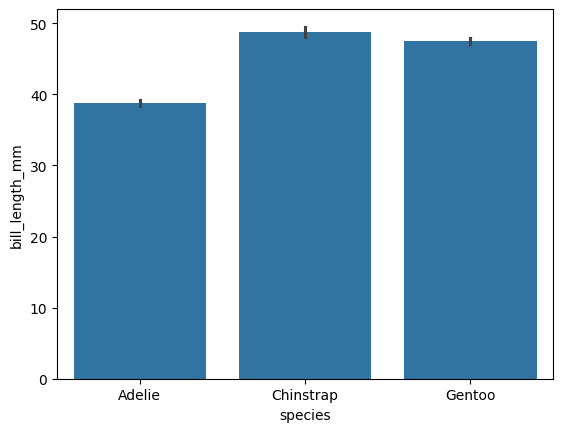

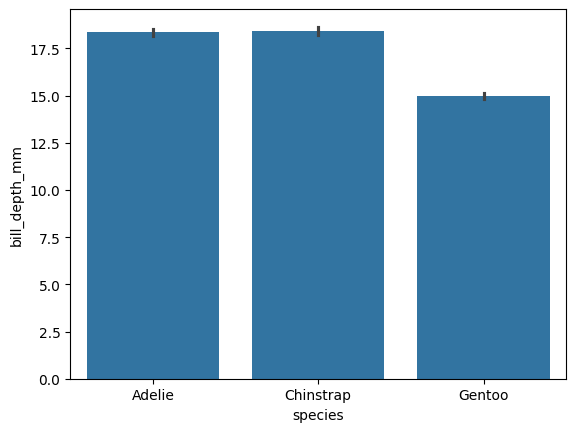

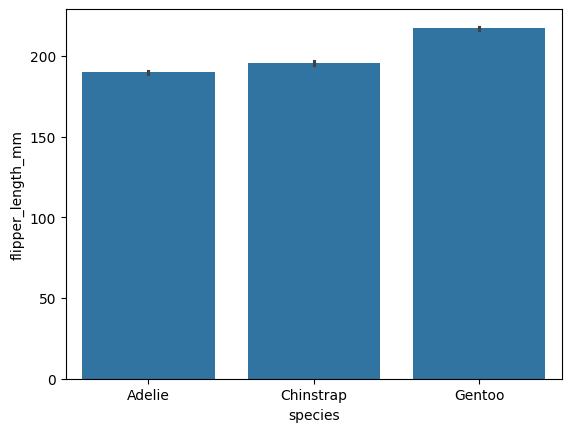

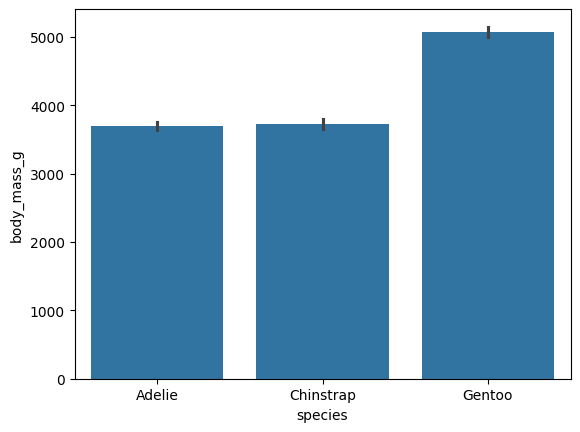

In [86]:
for col in penguins.drop(columns=['species', 'island', 'sex']):
    sns.barplot(data=penguins, x='species', y=col,  errorbar=('ci', 90))
    plt.show()

Note que por meio desta analise, a depender de qual variável estamos usando, ela pode ser boa ou não\
para distinguir a especie do penguin.

Por exemplo: A `body_mass_g` separa o Gentoo dos demais, mas não consegue destingir entre Adelie e Chinstrap.\
Já o `bill_depth` consegue destingir Adelie dos demais, mas não consegue destingir entre Gentoo e Chinstrap.

O que iremos buscar é realizar uma analise por meio de pares, realizando um gráfico de dispersão.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

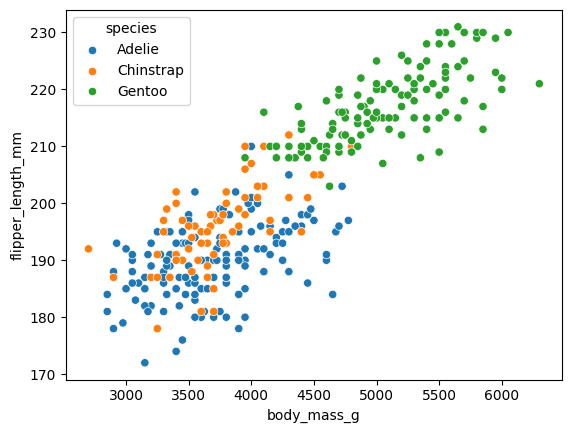

In [87]:
sns.scatterplot(x ='body_mass_g', y='flipper_length_mm', hue='species', data=penguins)

O resultado nos mostra que este dois pares consegue separar bem a especie Gentoo das demais,\
contudo, não consegue realizar uma boa distinção entre Chinstrap e Adelie.

Vamos analisar outro par:

<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

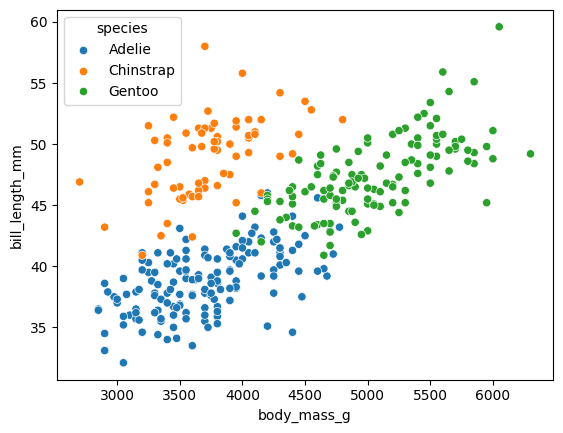

In [88]:
sns.scatterplot(x ='body_mass_g', y='bill_length_mm', hue='species', data=penguins)

Note que estes dois parâmetros consegue separar bem as três especies. 

Uma dúvida que pode surgir: Como sei que escolhi o melhor par de variáveis?

Usando o método `pairplot()` conseguimos realizar todas as combinações possíveis.

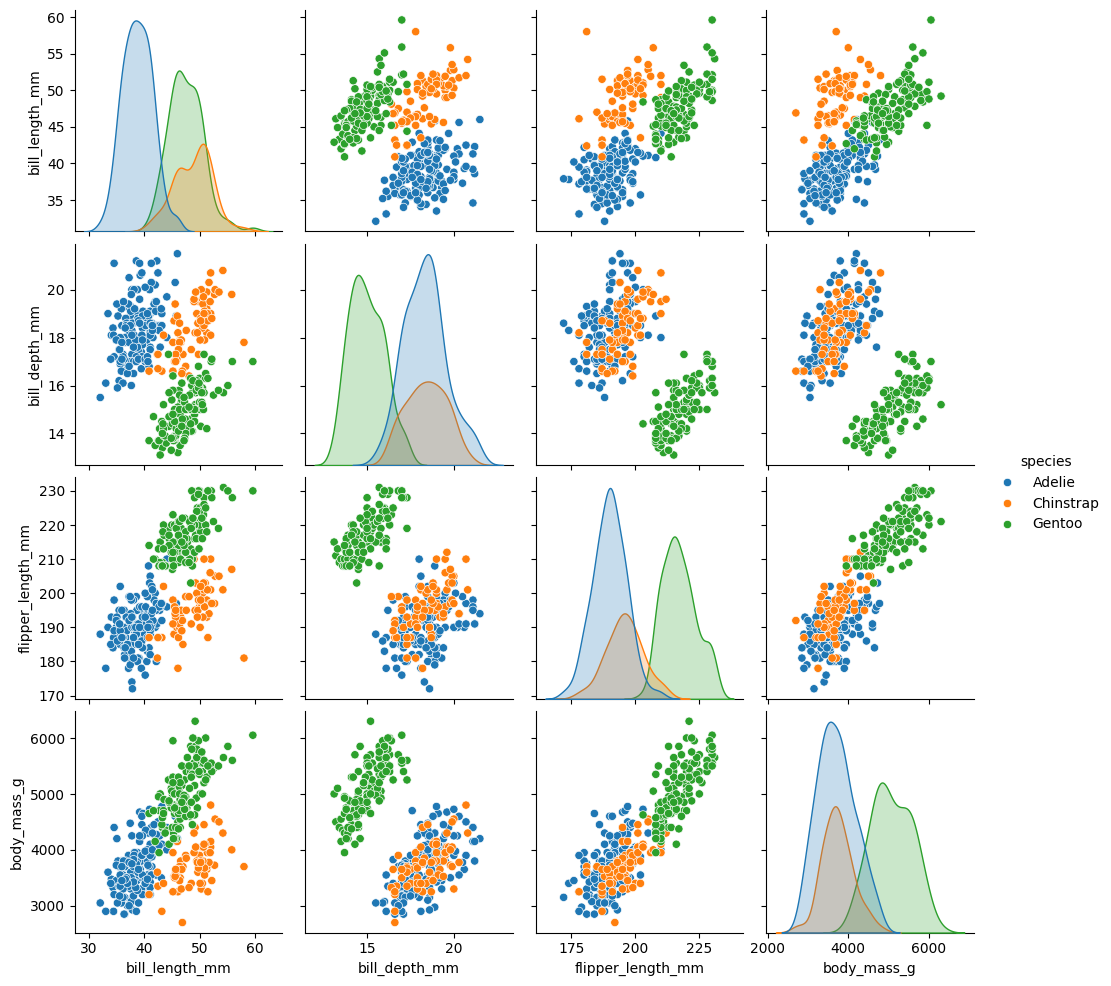

In [89]:
sns.pairplot(data=penguins, hue='species')

Nesta nota aprender a identificar a correlação entre as variáveis e identificar quais são as melhores.\
Contudo, ainda é necessário realizar cálculos estáticos para confirmar a correlação.

---
---
---

# 8) Construindo perguntas para motivar as análises

- 1) O ponto de partida sempre será buscar entender o contexto onde a análise será feita.\
Entender qual é a estrutura da aquisição de dados e como eles foram produzidos.\
Mas também buscar entender quais são as tomadas de decisões que serão feitas e o modelo de negócio\
associado a estrutura dos dados.

- 2) Quais são as perguntas que você quer responder? É possível que após a contextualização, temos algumas\
perguntas que desejamos responde-las. 

- 3) Um terceiro cenário são aqueles que não temos perguntas. Para este caso, devemos entender como as variáveis\
estão relacionadas; realizar questionamentos mais gerais; por fim, funilamos os questionamentos.

Ex.: Pergunta aberta: A chance de ter sazonalidade na venda do produto?
     Pergunta fechada: Qual o impacto da sazonalidade na venda do produto? É positivo ou negativo?
     Quantos porcento é o aumento da venda na subida e porcento da perda?

- 4) Por fim, queremos a validação das hipóteses feitas. Para isto, usamos cálculos estatísticos, teste de hipótese, visualização gráfica.\
É importante evitar palpite.

- 5) Ao termino da análise é importante informar o grupo foco desta análise e passar essa informação de forma clara e acessível.\
Gerando impacto na empresa.

---
---
---

# 9) Case completo

## Contextualização

1. Vamos ler o arquivo csv `wineequality-red.csv`, construindo um Data Frame do pandas.\
Queremos responder:

- O que representam os dados na colunas?
- Quantas linhas há no dataset?
- Quantas colunas há no dataset?
- QUais os tipos de dados em cada coluna?
- Há dados nulos (null, missing) na base?

Para começar, fomos falar com a area de negócio para entender o que os dados que nos passaram\
representam, essas são as informações que eles nos trouxeram.

- Medida de 11 variáveis físico-químicas que caracterizam cada amostra (as features do problema):

    - 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa\
    volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
    - 2 - volatile acidity - medida da acidez devido a ácido de baico peso molecular\
    (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto\
    de vinagre;
    - 3 - citric acid -  medida de ácido cítrico no vinho;
    - 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos\
    resíduos de açúcar da uba que permanecem no vinho após o fim da fermentação;
    - 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
    - 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
    - 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
    - 8 - density - medida da densidade do vinho;
    - 9 - pH - medida do pH do vinho;
    - 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
    - 11 - alcohol - medida da graduação alcoólica do vinho.
    - 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.
    
    
    
Daqui já podemos tentar formular um problema. Será que conseguimos tentar descrever a qualidade do vinho usando as demais 11 variáveis? Vamos descobrir
    

In [90]:
df = pd.read_csv('winequality-red.csv')

In [91]:
## Número de linhas e colunas
df.shape

(1599, 12)

In [92]:
## Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Todos os dados são contínuos, a exceção é apenas o dado de quality que é um inteiro. 

E não possuímos dados do tipo null ou missing.

In [93]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2) Vamos estudar a distribuição das variáveis numéricas, calculando, para cada coluna, as principais\
estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.).\

In [94]:
df_desc = df.describe()
df_desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
## IQR - Q3 - Q1

df_desc.loc['IQR'] = df_desc.loc['75%'] - df_desc.loc['25%']

df_desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
IQR,2.100000,0.250000,0.330000,0.700000,0.020000,14.000000,40.000000,0.002235,0.190000,0.180000,1.600000,1.000000


## Outliers

3) Vamos verificar agora se há outliers.

In [2]:
# visualizando distribuições com histogramas para ter intuição quanto ao outliers

for col in df:

    sbs.histplot(data=df, x=col, kde=True).set_title(f'Distribuição da variável {col}')
    plt.show()

NameError: name 'df' is not defined

Vamos agora usar o método dos quartis

In [97]:
## Método do Quartil

for col in df.drop(columns='quality'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    aux_outlier = df[(df[col] < Q1 - (IQR*1.5)) | (df[col] > Q3 + (IQR*1.5)) ]

    indices_outlier = aux_outlier.index.tolist()

    if len(indices_outlier) >=1:

        print(f"A coluna {col} tem {len(indices_outlier)} outliers!")
        print("\nOs índices deles são: \n")
        print(indices_outlier)

    else:
        print(f"A coluna {col} não posse outliers!")

    print()
    print("="*80)
    print()


A coluna fixed acidity tem 49 outliers!

Os índices deles são: 

[205, 206, 243, 244, 264, 294, 328, 338, 339, 347, 353, 359, 363, 364, 366, 374, 381, 391, 394, 409, 429, 440, 442, 446, 470, 472, 509, 510, 516, 538, 544, 548, 554, 555, 557, 559, 560, 564, 565, 596, 599, 601, 603, 611, 652, 680, 811, 814, 1224]


A coluna volatile acidity tem 19 outliers!

Os índices deles são: 

[38, 94, 120, 126, 127, 134, 199, 553, 672, 690, 700, 705, 710, 724, 899, 1261, 1299, 1312, 1467]


A coluna citric acid tem 1 outliers!

Os índices deles são: 

[151]


A coluna residual sugar tem 155 outliers!

Os índices deles são: 

[9, 11, 14, 15, 18, 33, 35, 39, 40, 55, 57, 64, 65, 154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274, 275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375, 378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480, 484, 494, 501, 502, 510, 515, 516, 538, 539, 541, 554, 555, 556, 557, 558, 559, 564, 595, 606, 608, 624, 625, 645, 649, 652, 659, 690, 705, 719,

O nosso objetivo agora é remover estes outliers.

In [101]:
df_inliers = pd.DataFrame()

for col in df.drop(columns='quality'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df_filtered = df[(df[col] >= Q1 - (IQR*1.5)) & (df[col] <= Q3 + (IQR*1.5)) ]
    df_inliers = pd.concat([df_inliers, df_filtered])

df_inliers = df_inliers.drop_duplicates()

df_inliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
680,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,5
811,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6


## Estudo da variável resposta

4) Estudo dos dados da coluna `quality`, que é a variável resposta do problema. Em particular,\
queremos responder:

- Essa é uma variável contínua ou discreta?
- Como as notas estão distribuidas? Quais as notas mais/menos comuns?
- Faz sentido descritizar esta variável em dois níveis categóricos? É bom ou ruim?
    - Se sim, qual seria o valor de corte, e com este corte, qual é o significado de cada nível categórico?
    - Como este dois níveis categóricos estão distribuidos?

In [104]:
df_inliers['quality'].value_counts(normalize=True)

quality
5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: proportion, dtype: float64

Note que os vinhos com nota 8 são apenas 1% dos dados, assim como os vinhos de nota 4 (3%) e 3 (0.7%) dos dados.\
Eles representam uma parcela muito pequena dos nossos dados. Utilizar eles seria complicado, pois não temos informações\
suficientes para podermos identificar o que faz um vinho ser nota 8, 4 ou 3.\
O que nos leva a remove-los.

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='Count'>

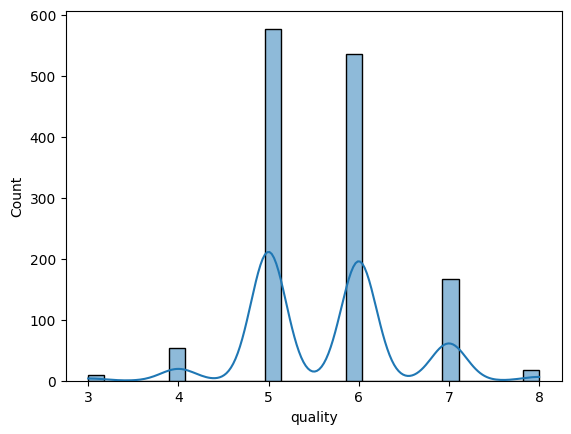

In [107]:
display(df_inliers['quality'].describe())

sns.histplot(data=df_inliers, x='quality', kde=True)

Identificamos que a boa parte das notas dos vinhos é em torno de 5.6, e que nosso banco de dados não contempla\
os extremos, não temos vinhos 10 ou 0.

## Correlação

5) vamos buscar a correlação das variáveis descritivas com a variável resposta para buscar algumas\
que pareçam influenciar mais a nota.

In [109]:
df_inliers.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<Axes: >

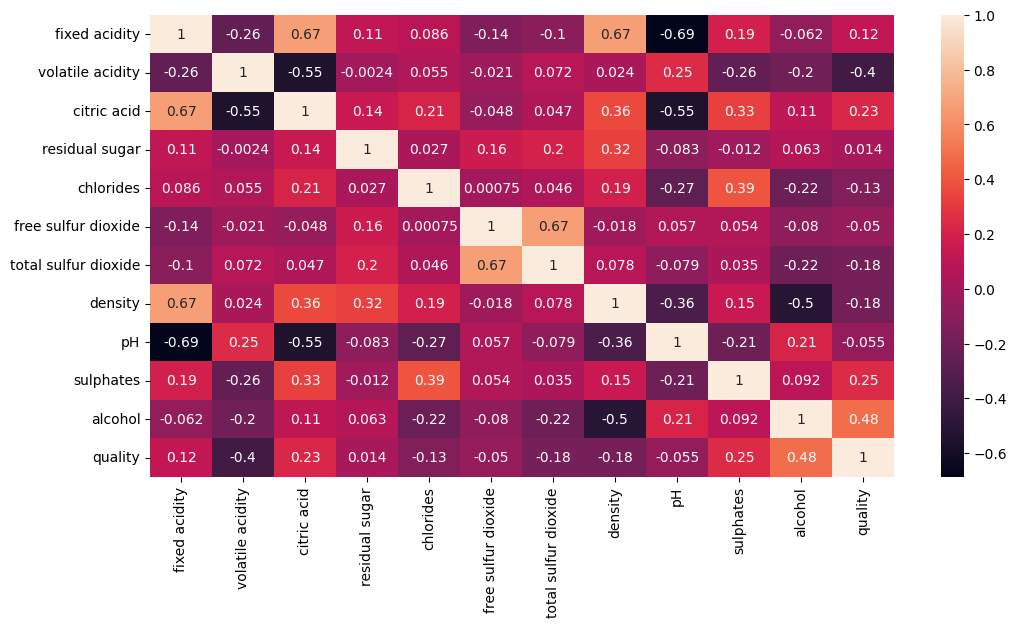

In [115]:
plt.figure(figsize=(12,6))

sbs.heatmap(df_inliers.corr(), annot=True)

In [116]:
df_inliers.corr()['quality'].sort_values()

volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
fixed acidity           0.119024
citric acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

As duas principais características que influenciam a `quality` são o `volatile_acidity` e `alcohol`.

6) Vamos agora visualizar o intervalo de confiança de 90% para a média de cada uma das variáveis\
físico-químicas, agrupando-as pelos níveis categóricos de variável resposta `quality`.

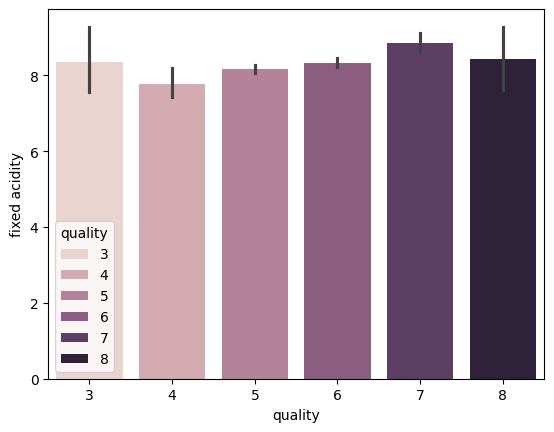

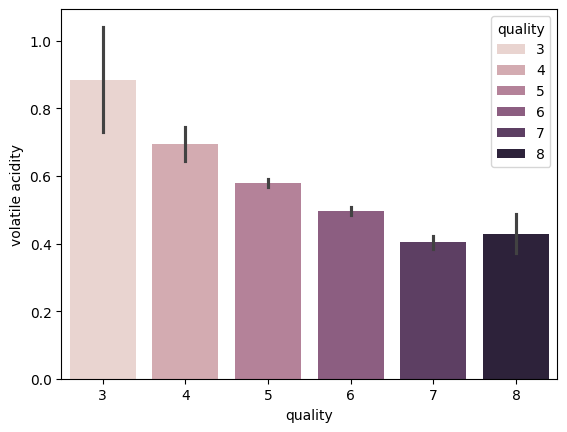

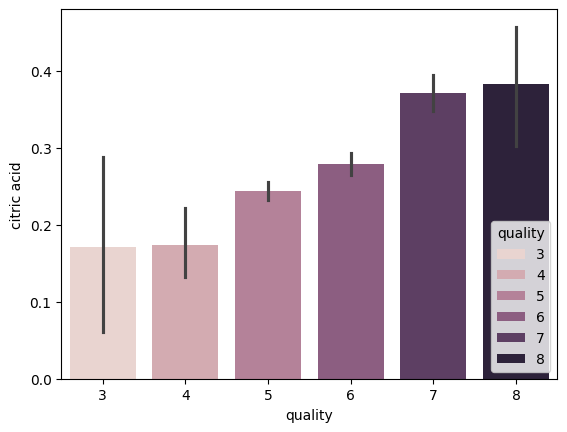

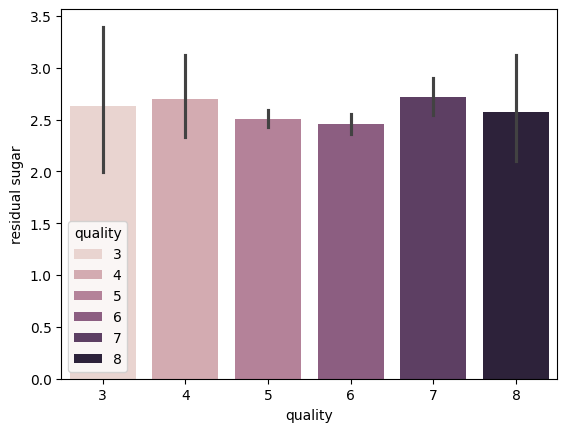

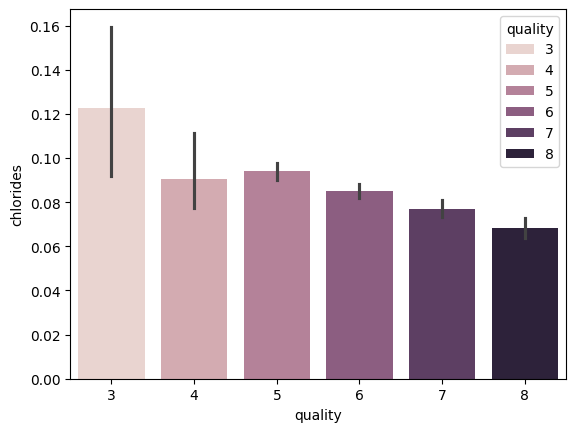

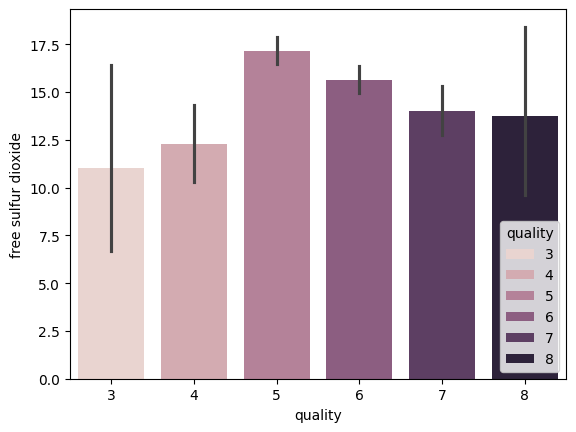

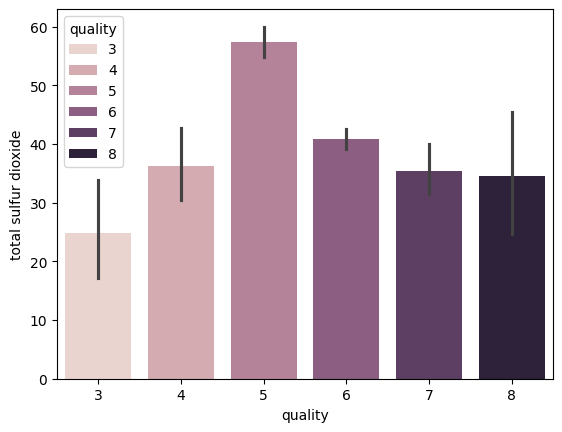

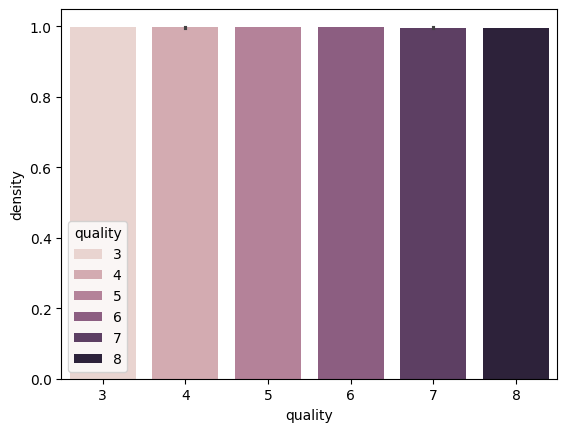

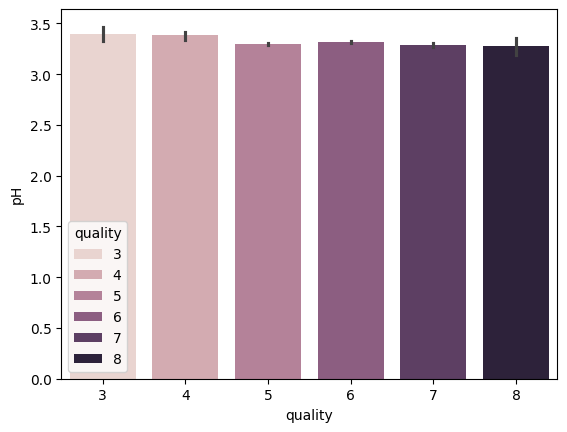

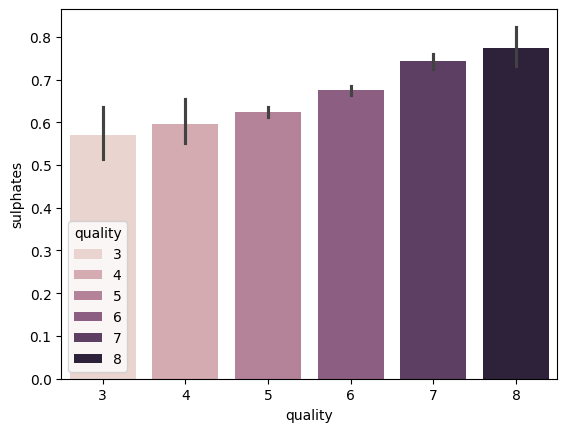

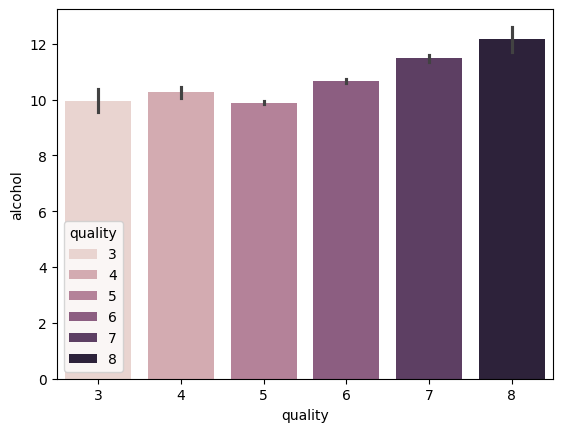

In [117]:
for col in df_inliers.drop(columns='quality'):

    sbs.barplot(data=df_inliers, x='quality', y=col, errorbar=('ci', 90), hue='quality')
    plt.show()

Note que para algumas variáveis, devido a baixa quantidade de dados para os vinhos de notas extremas, fica impreciso\
inferir precisão se estas característica influenciam na nota deles. Outro ponto é a barra do nível de confiança para\
algumas variáveis são ligeiramente granes. Portante, inferir uma nota para o vinho é impreciso.

O que nos leva a categorizar os vinhos entre bons e ruins, será desta forma é mais fácil?

In [118]:
df_inliers['quality_bin'] = df_inliers['quality'].apply(lambda x : 'bom' if x > 5 else 'ruim')

In [119]:
df_bin = df_inliers.drop(columns=['quality'])
df_bin.to_csv('wineequality-red-binary.csv', index=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bom
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,ruim
680,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,ruim
811,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,bom
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,bom


É importante salvar este Data set para uso posterior.

In [121]:
df_bin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bom
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,ruim
680,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,ruim
811,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,bom
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,bom


In [122]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1224
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality_bin           1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 138.0+ KB


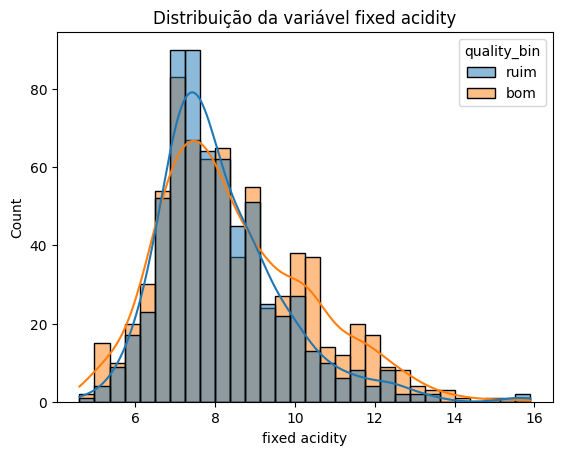

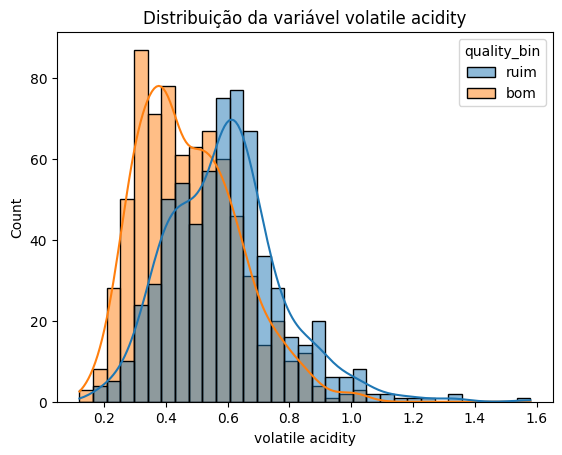

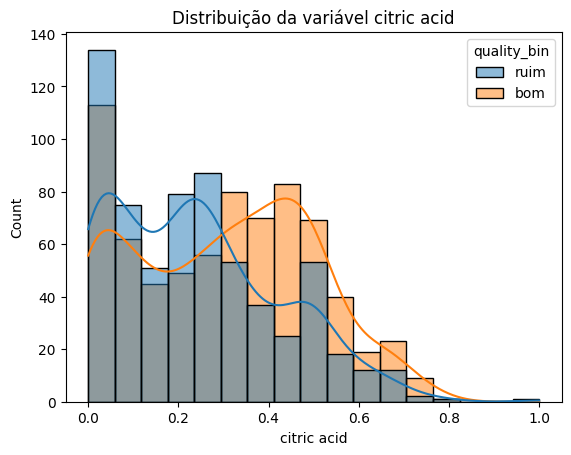

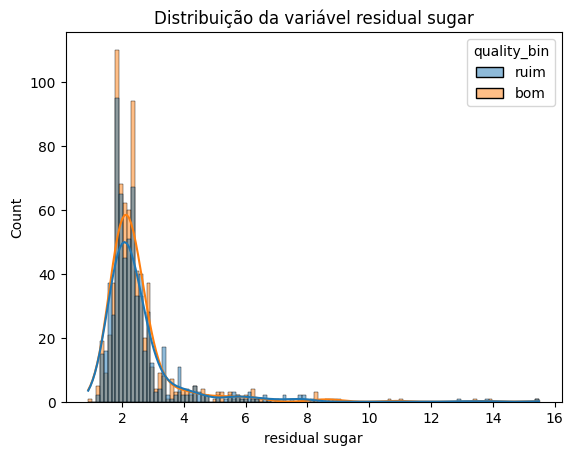

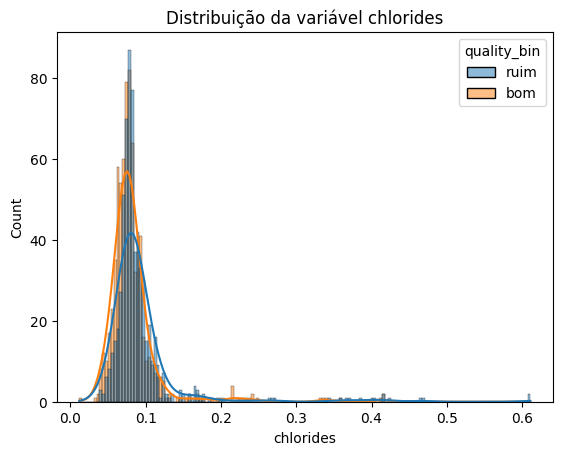

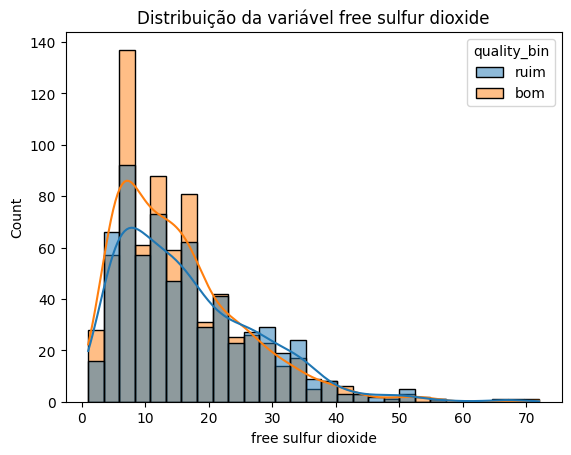

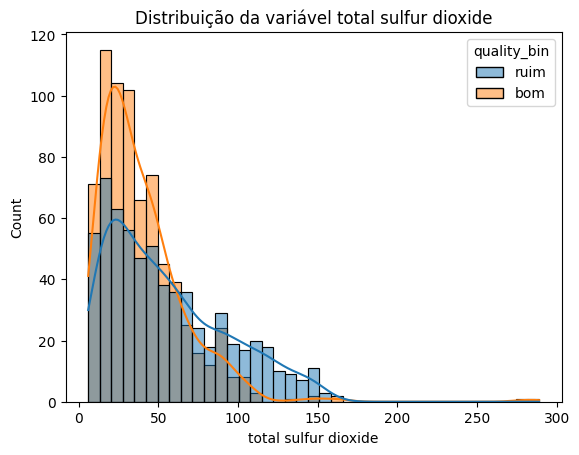

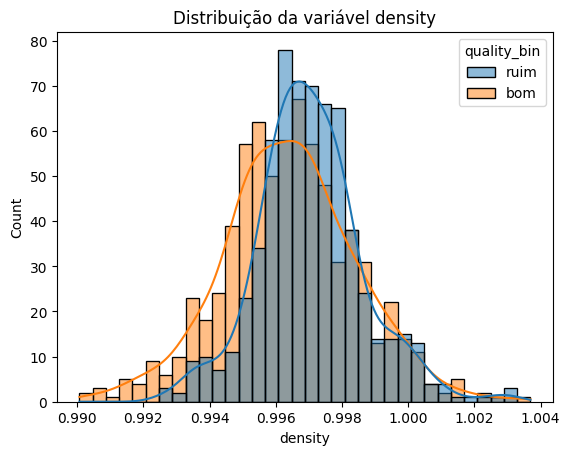

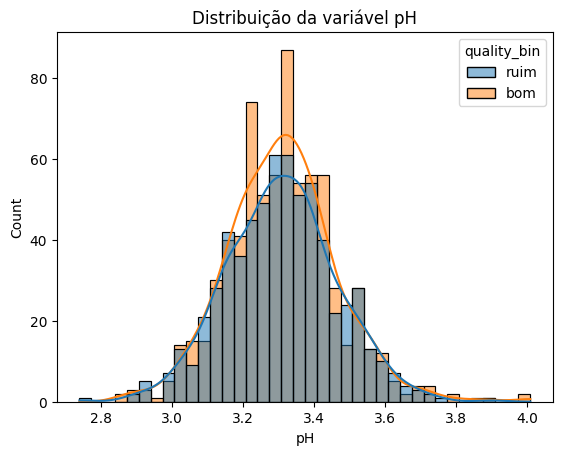

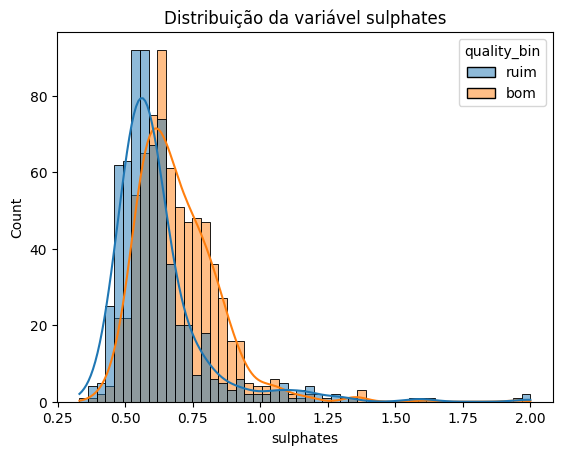

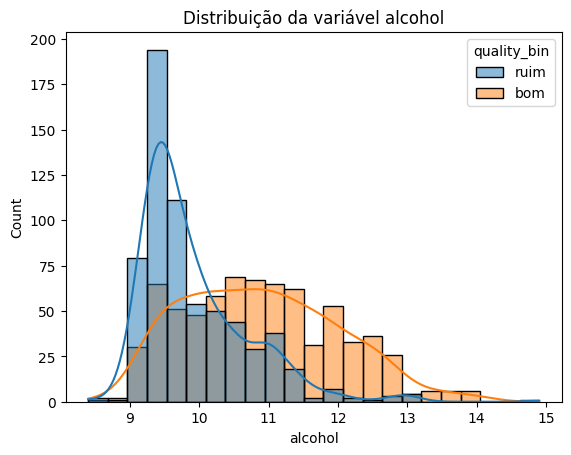

In [123]:
for col in df_bin.drop(columns=['quality_bin']):

    sbs.histplot(data=df_bin, x=col, kde=True, hue=df_bin['quality_bin']).set_title(f"Distribuição da variável {col}")
    plt.show()

Percebemos que as variáveis `alcohol` e `volatile acidity` conseguem separar os vinhos entre bons e ruins, agora que mudamos\
para um problema binário.

---
---
---